Complete


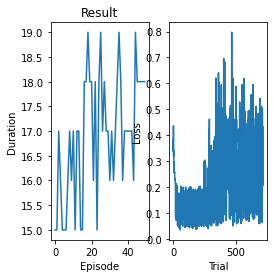

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from MovementNN import MovementNN
from NNTrainer import NNTrainer

BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4
n_hiddens_per_layer=[512, 256, 128]
num_episodes = 50

trainer = NNTrainer(
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    eps_start=EPS_START,
    eps_end=EPS_END,
    eps_decay=EPS_DECAY,
    tau=TAU,
    learning_rate=LR,
    n_hiddens_per_layer=n_hiddens_per_layer,
    num_episodes=num_episodes
)

file_path = "saved_model.pth"

if os.path.exists(file_path):
    trainer.load_model(file_path)

trainer.train()

trainer.save_model(file_path)

In [3]:
trainer.use()

<Figure size 432x288 with 0 Axes>